In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

<bold><h3>Combine all CSV files in each folder into a single CSV file per folder</h3><bold>

In [ ]:
dfs = []

for i in range(1,6):
    file_pattern = f"Etaj {i}/Log1-*.xlsx"
    file_list = glob.glob(file_pattern)

    for file in file_list:
        df = pd.read_excel(file)
        dfs.append(df)

    merged_df = pd.concat(dfs, ignore_index=True)

    merged_df.columns = ["System Time","Power Consumed"]

    merged_df.to_csv(f"etaj{i}_merged_data.csv", index=False)

<bold><h3>Combine all CSV files into one CSV file</h3></bold>

In [ ]:
file_pattern = "etaj*_merged_data.csv"
file_list = glob.glob(file_pattern)

dfs = []

for file in file_list:
    df = pd.read_csv(file)
    dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True)

merged_df.to_csv("all_etaj_merged_data.csv", index=False)

<bold><h3>Read the dataset of each building</h3></bold>

In [7]:
df_building1 = pd.read_csv('etaj1_merged_data.csv')
df_building2 = pd.read_csv('etaj2_merged_data.csv')
df_building3 = pd.read_csv('etaj3_merged_data.csv')
df_building4 = pd.read_csv('etaj4_merged_data.csv')
df_building5 = pd.read_csv('etaj5_merged_data.csv')

<bold><h3>Get all the information for all the buildings</h3></bold>

In [8]:
stats_building1 = df_building1.describe().loc[['mean', 'min', 'max'], 'Power Consumed']
stats_building2 = df_building2.describe().loc[['mean', 'min', 'max'], 'Power Consumed']
stats_building3 = df_building3.describe().loc[['mean', 'min', 'max'], 'Power Consumed']
stats_building4 = df_building4.describe().loc[['mean', 'min', 'max'], 'Power Consumed']
stats_building5 = df_building5.describe().loc[['mean', 'min', 'max'], 'Power Consumed']

stats_combined = pd.DataFrame({
    'Building 1': stats_building1,
    'Building 2': stats_building2,
    'Building 3': stats_building3,
    'Building 4': stats_building4,
    'Building 5': stats_building5
}).transpose()

stats_combined.columns = ['Mean Power Consumed', 'Minimum Power Consumed', 'Maximum Power Consumed']
stats_combined

,Mean Power Consumed,Minimum Power Consumed,Maximum Power Consumed
Building 1,6119.964508,92.0,33212.0
Building 2,6040.170555,381.0,31035.0
Building 3,6148.946767,0.0,38756.0
Building 4,6472.204133,0.0,42392.0
Building 5,6373.710451,0.0,42392.0


This table shows the maximum, minimum and average power consumed for each building.

<bold><h3>Minimum and Maximum Power consumption occurence for all buildings</h3></bold>

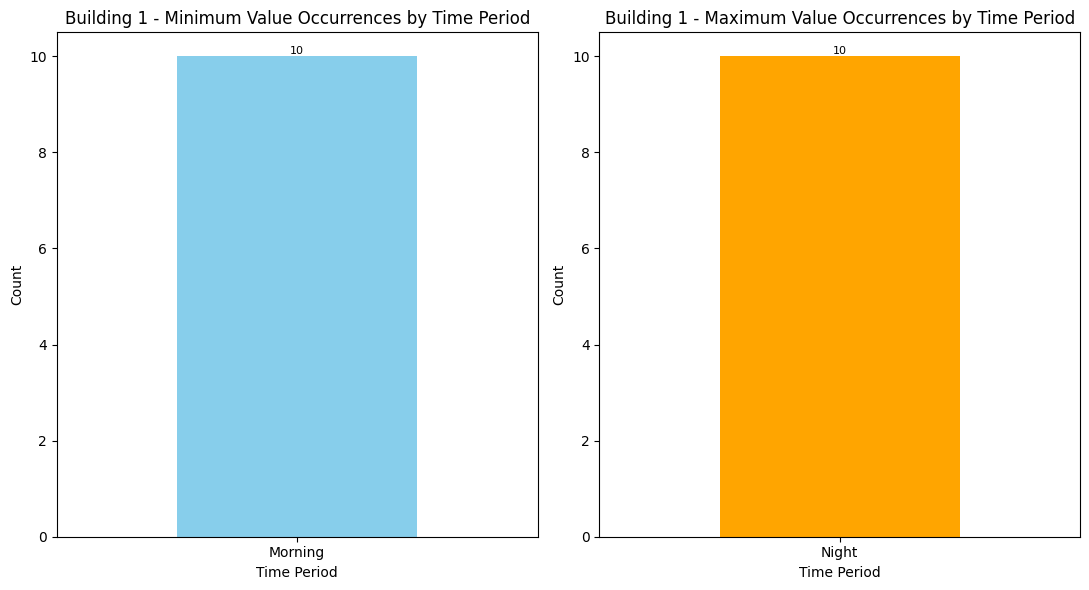

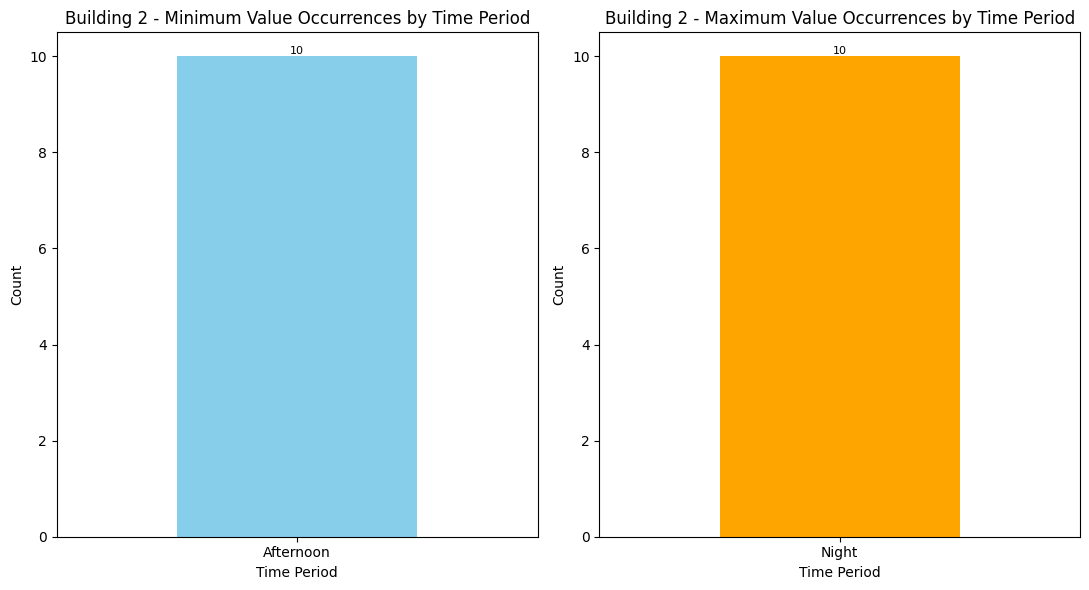

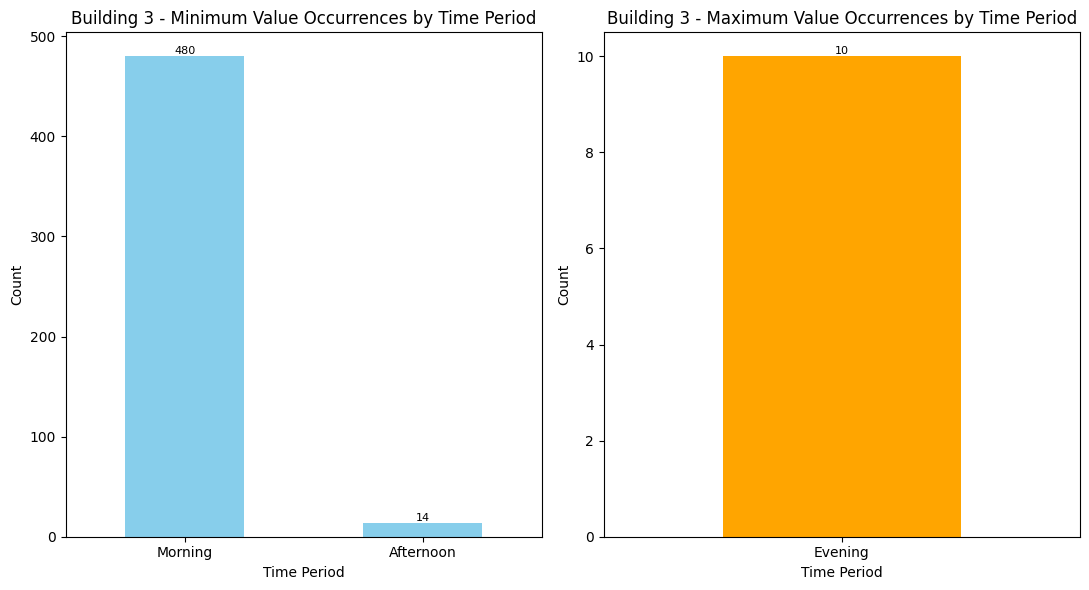

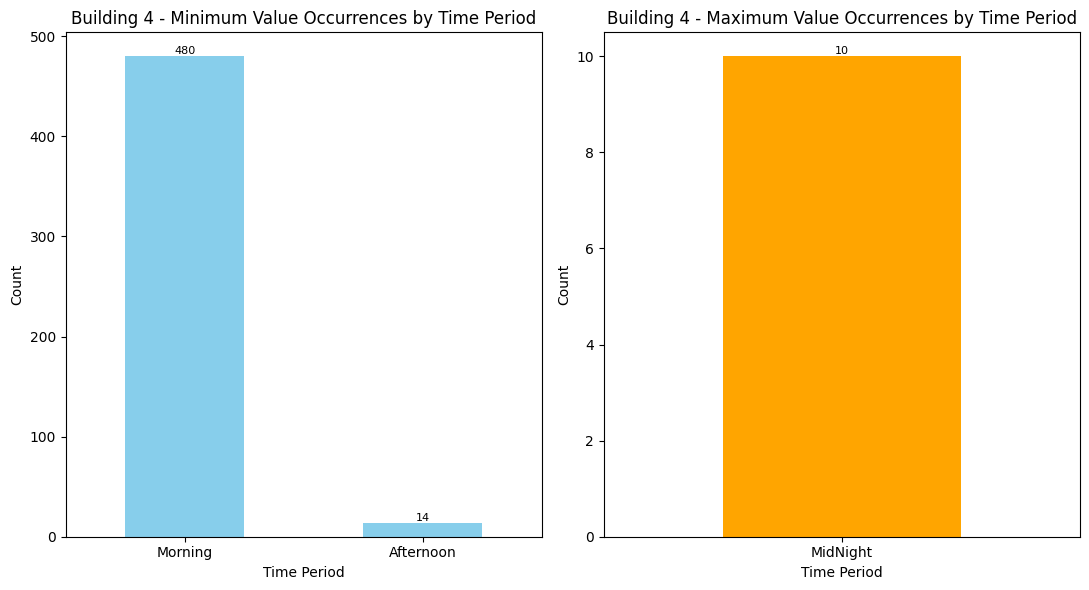

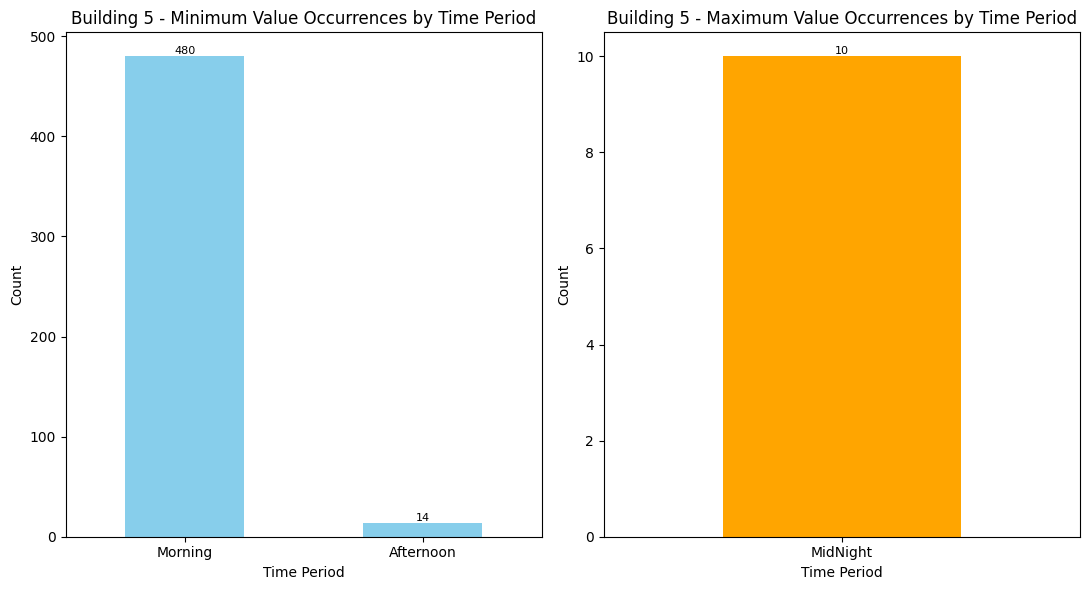

In [9]:
buildings = [df_building1, df_building2, df_building3, df_building4, df_building5]
building_names = ['Building 1', 'Building 2', 'Building 3', 'Building 4', 'Building 5']

for i, df in enumerate(buildings):
    df['System Time'] = pd.to_datetime(df['System Time'])

    def categorize_time(timestamp):
        hour = timestamp.hour
        if 5 <= hour < 12:
            return 'Morning'
        elif 12 <= hour < 16:
            return 'Afternoon'
        elif 16 <= hour < 20:
            return 'Evening'
        elif 20 <= hour <= 23:
            return 'Night'
        else:
            return 'MidNight'

    df['Time Period'] = df['System Time'].apply(categorize_time)

    min_value = df['Power Consumed'].min()
    max_value = df['Power Consumed'].max()

    min_data = df[df['Power Consumed'] == min_value]
    max_data = df[df['Power Consumed'] == max_value]

    min_counts = min_data['Time Period'].value_counts()
    max_counts = max_data['Time Period'].value_counts()

    fig, ax = plt.subplots(1, 2, figsize=(11, 6))

    min_counts.plot(kind='bar', ax=ax[0], color='skyblue', title=f'{building_names[i]} - Minimum Value Occurrences by Time Period')
    ax[0].set_xlabel('Time Period')
    ax[0].set_ylabel('Count')
    ax[0].set_xticklabels(min_counts.index, rotation=0)
    for container in ax[0].containers:
        ax[0].bar_label(container, fmt='%d', label_type='edge', fontsize=8)

    max_counts.plot(kind='bar', ax=ax[1], color='orange', title=f'{building_names[i]} - Maximum Value Occurrences by Time Period')
    ax[1].set_xlabel('Time Period')
    ax[1].set_ylabel('Count')
    ax[1].set_xticklabels(max_counts.index, rotation=0)
    for container in ax[1].containers:
        ax[1].bar_label(container, fmt='%d', label_type='edge', fontsize=8)

    plt.tight_layout()
    plt.show()

This analysis examines the time periods for minimum and maximum power consumption across all buildings. The dataset is categorized into time periods (Morning, Afternoon, Evening, Night, and Midnight) based on the `System Time` column.

Key observations:
- **Minimum Power Consumption**: Predominantly occurs during the Morning period, with occasional occurrences in the Afternoon.
- **Maximum Power Consumption**: Observed exclusively during the Midnight period across all buildings.

The bar graphs visually represent the frequency of minimum and maximum power consumption occurrences for each building during different time periods.

<bold><h3>Day-wise Average Power Consumption Visualization</h3></bold>

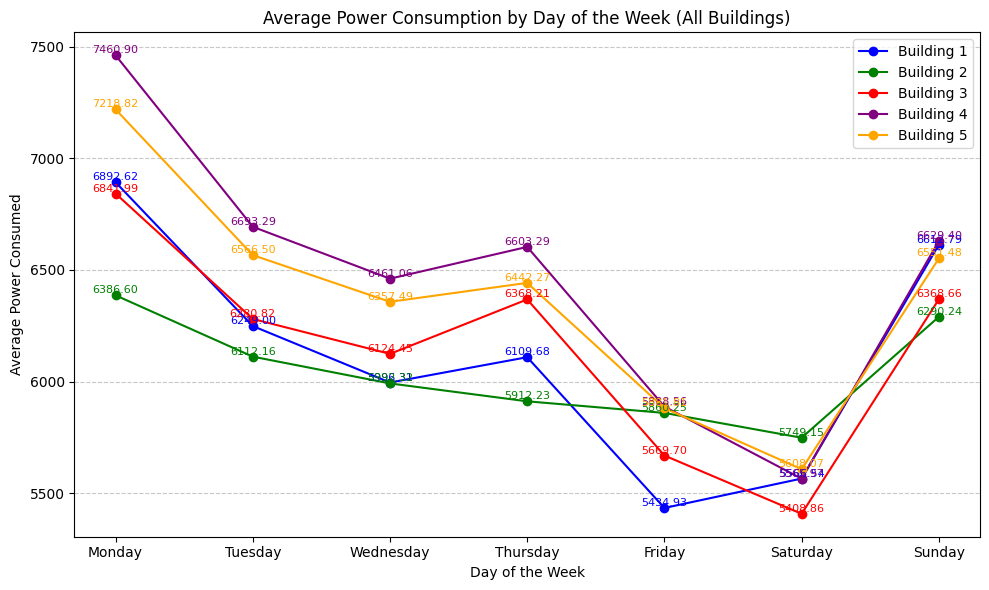

In [ ]:
buildings = [df_building1, df_building2, df_building3, df_building4, df_building5]
building_names = ['Building 1', 'Building 2', 'Building 3', 'Building 4', 'Building 5']
colors = ['blue', 'green', 'red', 'purple', 'orange']

plt.figure(figsize=(10, 6))

for i, df in enumerate(buildings):
    df['System Time'] = pd.to_datetime(df['System Time'])
    
    df['Day'] = df['System Time'].dt.day_name()
    
    day_avg = df.groupby('Day')['Power Consumed'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    
    plt.plot(day_avg.index, day_avg.values, marker='o', color=colors[i], label=building_names[i])

    for j, value in enumerate(day_avg.values):
        plt.text(j, value, f"{value:.2f}", ha='center', va='bottom', fontsize=8, color=colors[i])

plt.ylabel('Average Power Consumed')
plt.xlabel('Day of the Week')
plt.title('Average Power Consumption by Day of the Week (All Buildings)')
plt.xticks(rotation=0)

plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

1. **Highest Average Power Consumption** : The highest average power consumption is observed on **Monday**, with a value of approximately **7218.82** units across all buildings.

2. **Lowest Average Power Consumption** : The lowest average power consumption occurs on **Saturday**, with a value of approximately **5608.07** units across all buildings.

3. **Weekday vs Weekend** : Weekdays (Monday to Friday) generally show higher average power consumption compared to weekends (Saturday and Sunday). This trend could indicate higher energy usage during workdays, possibly due to industrial or commercial activities across all buildings.

4. **Fluctuations Across the Week** : There is a noticeable decline in average power consumption as the week progresses, with Monday starting at the peak and Saturday reaching the lowest point. Sunday shows a slight increase compared to Saturday, possibly due to preparatory activities for the upcoming week.

The line chart demonstrates a clear pattern of higher energy usage during the start of the week, tapering off towards the weekend across all buildings.

<bold><h3>Month-wise Average Power Consumption Visualization for each building</h3></bold>

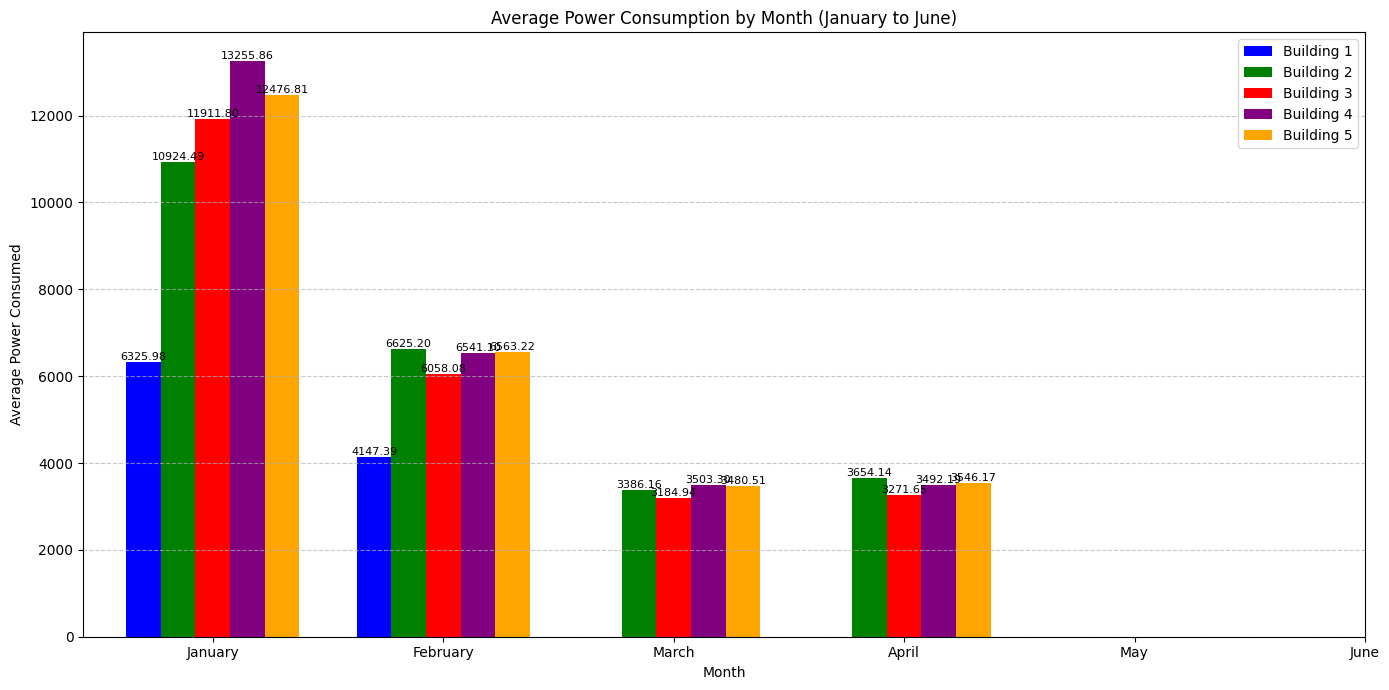

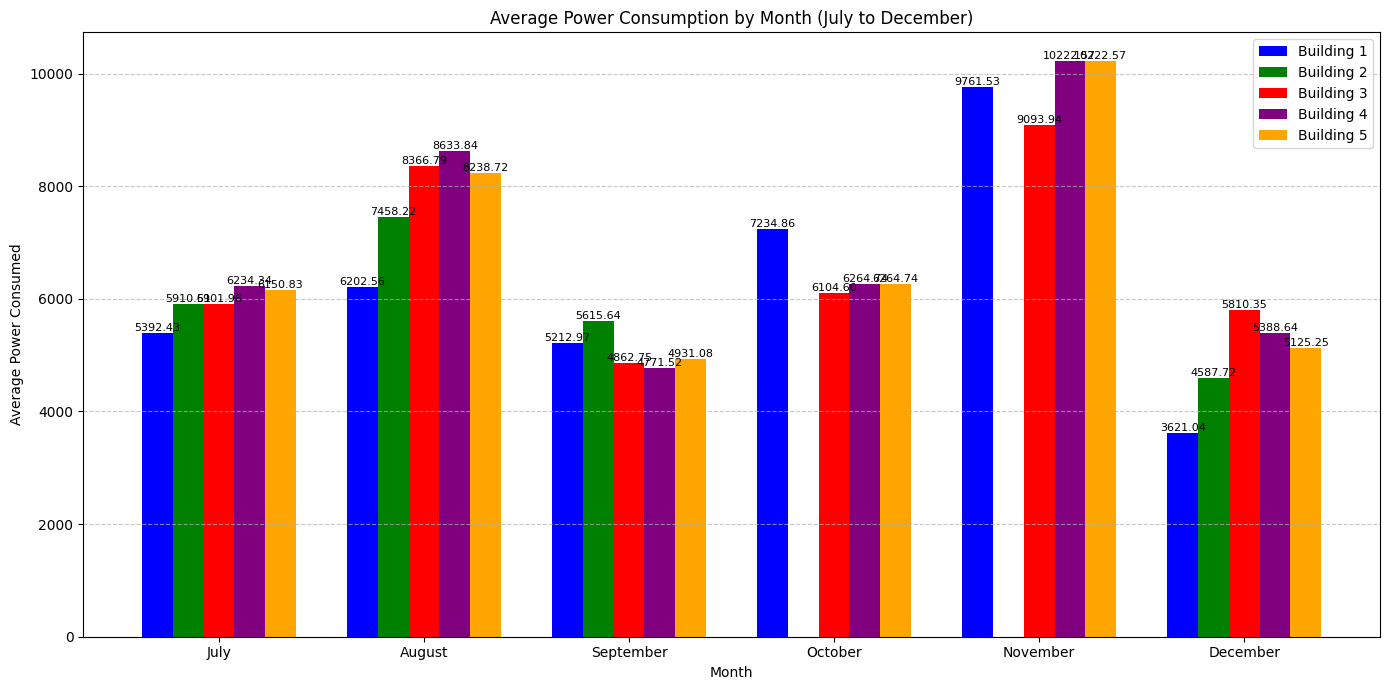

In [ ]:
import numpy as np

buildings = [df_building1, df_building2, df_building3, df_building4, df_building5]
building_names = ['Building 1', 'Building 2', 'Building 3', 'Building 4', 'Building 5']
colors = ['blue', 'green', 'red', 'purple', 'orange']

for df in buildings:
    df['System Time'] = pd.to_datetime(df['System Time'])
    df['Month'] = df['System Time'].dt.month_name()

month_avg_data = []
for df in buildings:
    month_avg = df.groupby('Month')['Power Consumed'].mean().reindex([
        'January', 'February', 'March', 'April', 'May', 'June', 
        'July', 'August', 'September', 'October', 'November', 'December'
    ])
    month_avg_data.append(month_avg.values)

month_avg_data = np.array(month_avg_data)

months_part1 = ['January', 'February', 'March', 'April', 'May', 'June']
months_part2 = ['July', 'August', 'September', 'October', 'November', 'December']

x1 = np.arange(len(months_part1))  
bar_width = 0.15 

plt.figure(figsize=(14, 7))
for i, (building_avg, color, name) in enumerate(zip(month_avg_data, colors, building_names)):
    plt.bar(x1 + i * bar_width, building_avg[:6], width=bar_width, color=color, label=name)

for i, building_avg in enumerate(month_avg_data):
    for j, value in enumerate(building_avg[:6]):
        plt.text(x1[j] + i * bar_width, value, f"{value:.2f}", ha='center', va='bottom', fontsize=8)

plt.xticks(x1 + bar_width * (len(buildings) - 1) / 2, months_part1, rotation=0)
plt.ylabel('Average Power Consumed')
plt.xlabel('Month')
plt.title('Average Power Consumption by Month (January to June)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

x2 = np.arange(len(months_part2))  

plt.figure(figsize=(14, 7))
for i, (building_avg, color, name) in enumerate(zip(month_avg_data, colors, building_names)):
    plt.bar(x2 + i * bar_width, building_avg[6:], width=bar_width, color=color, label=name)

for i, building_avg in enumerate(month_avg_data):
    for j, value in enumerate(building_avg[6:]):
        plt.text(x2[j] + i * bar_width, value, f"{value:.2f}", ha='center', va='bottom', fontsize=8)

plt.xticks(x2 + bar_width * (len(buildings) - 1) / 2, months_part2, rotation=0)
plt.ylabel('Average Power Consumed')
plt.xlabel('Month')
plt.title('Average Power Consumption by Month (July to December)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

1. **Highest Average Power Consumption** : The highest average power consumption is observed in **January**, with a value of approximately **13,255.86** units. This could indicate increased energy usage during the winter season, possibly due to heating requirements.
     
2. **Lowest Average Power Consumption** : The lowest average power consumption is observed in **March**, with a value of approximately **3,184.94** units. This may reflect reduced energy usage during the transition from winter to spring.
     
3. **Seasonal Trends** : 
   <u>Winter Months (December to February)</u> : Higher power consumption is observed, particularly in **January**, likely due to heating needs.
   <u>Summer Months (June to August)</u> : Power consumption increases in **August**, possibly due to cooling requirements during peak summer.
      
4. **Missing Data** : Data for **May** and **June** is missing, which impact the overall analysis and seasonal trends.

<bold><h3>Hourly Load profile of all buildings</h3></bold>

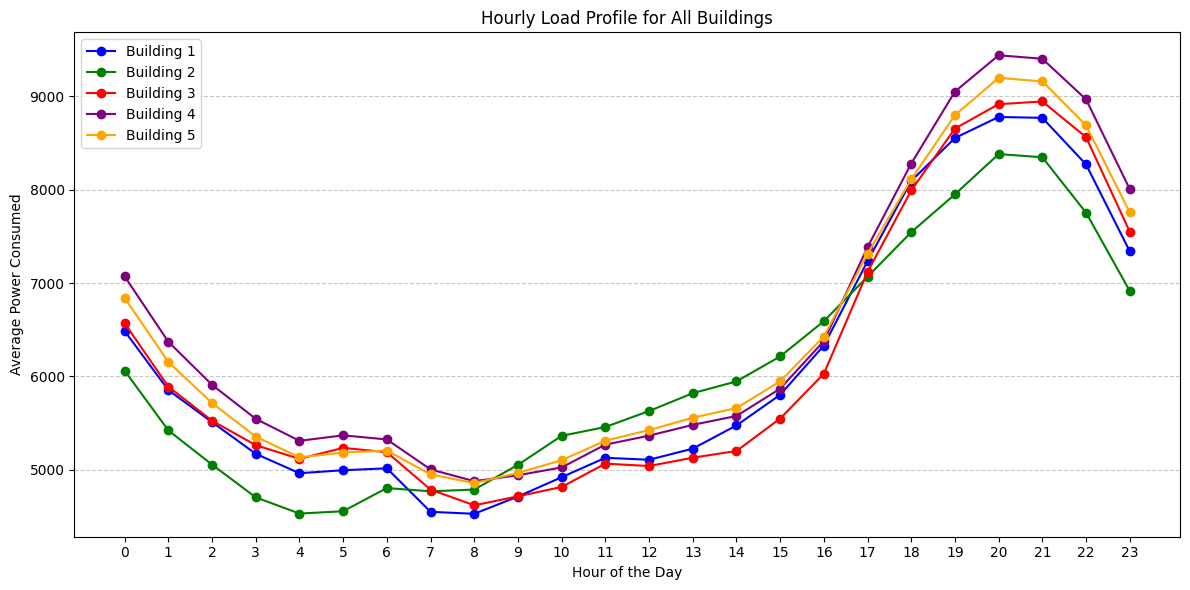

In [ ]:
plt.figure(figsize=(12, 6))

for i, df in enumerate(buildings):
    df['Hour'] = df['System Time'].dt.hour
    hourly_avg = df.groupby('Hour')['Power Consumed'].mean()
    
    plt.plot(hourly_avg.index, hourly_avg.values, marker='o', label=building_names[i], color=colors[i])

plt.xlabel('Hour of the Day')
plt.ylabel('Average Power Consumed')
plt.title('Hourly Load Profile for All Buildings')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

The hourly load profile provides insights into the average power consumption across all buildings for each hour of the day. Key observations include:
1. **Peak Hours**: The highest average power consumption occurs during the evening hours (18:00 - 20:00), indicating increased energy usage during this period.
2. **Off-Peak Hours**: The lowest average power consumption is observed during the early morning hours (2:00 - 5:00), reflecting reduced activity during these times.
3. **Gradual Increase**: Power consumption gradually increases from early morning to late evening, likely due to increased human activity and operational demands.

<bold><h3>Load data plot for each building</h3></bold>

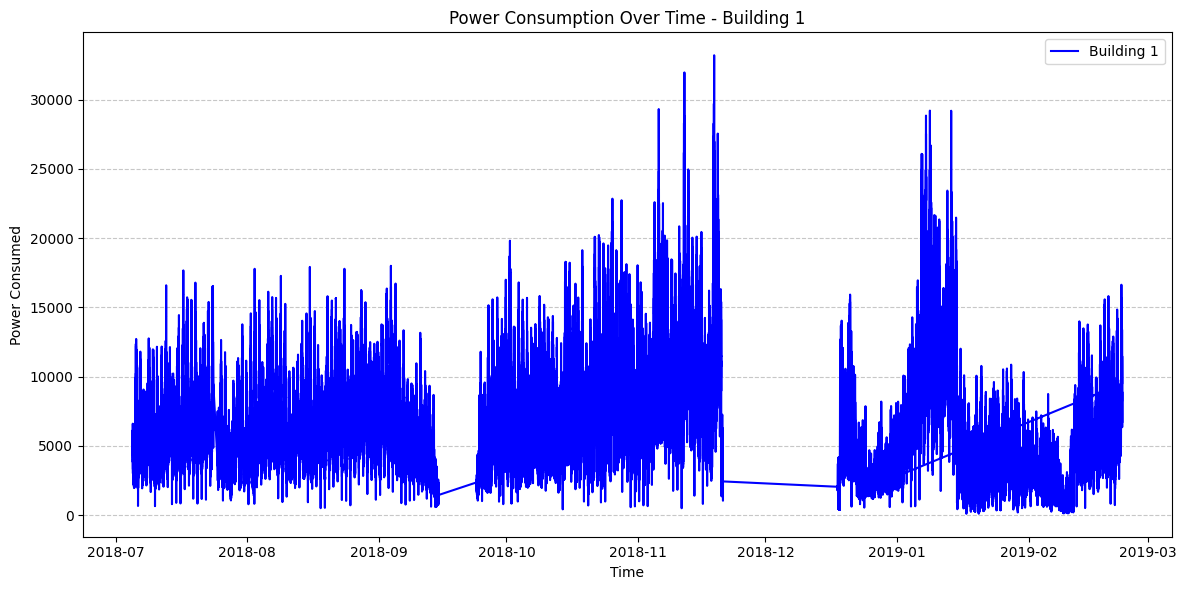

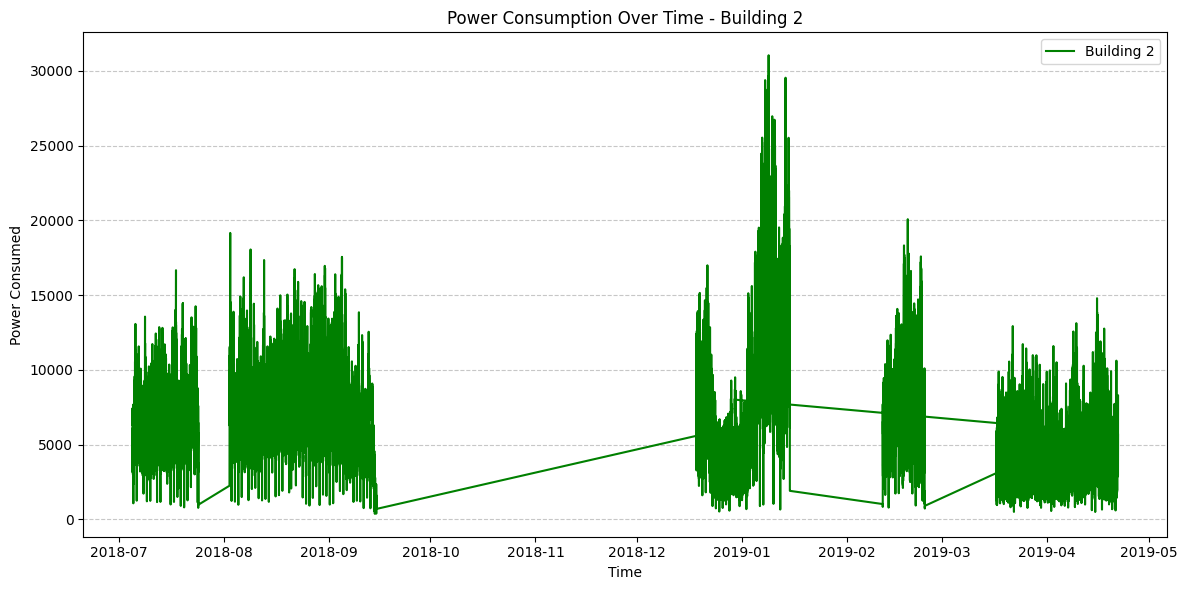

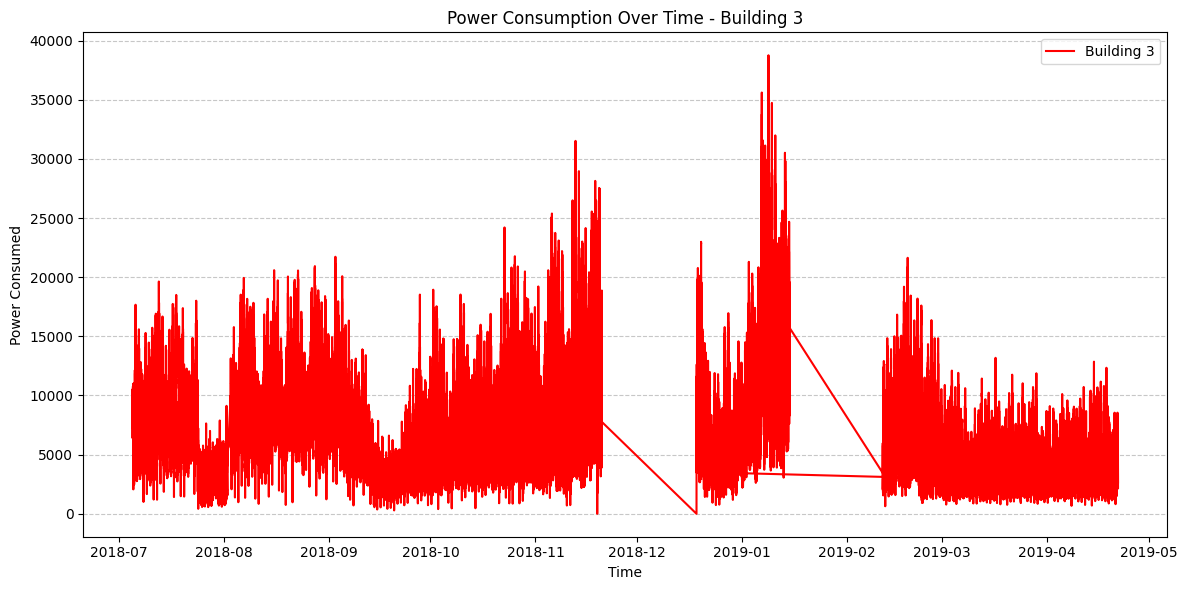

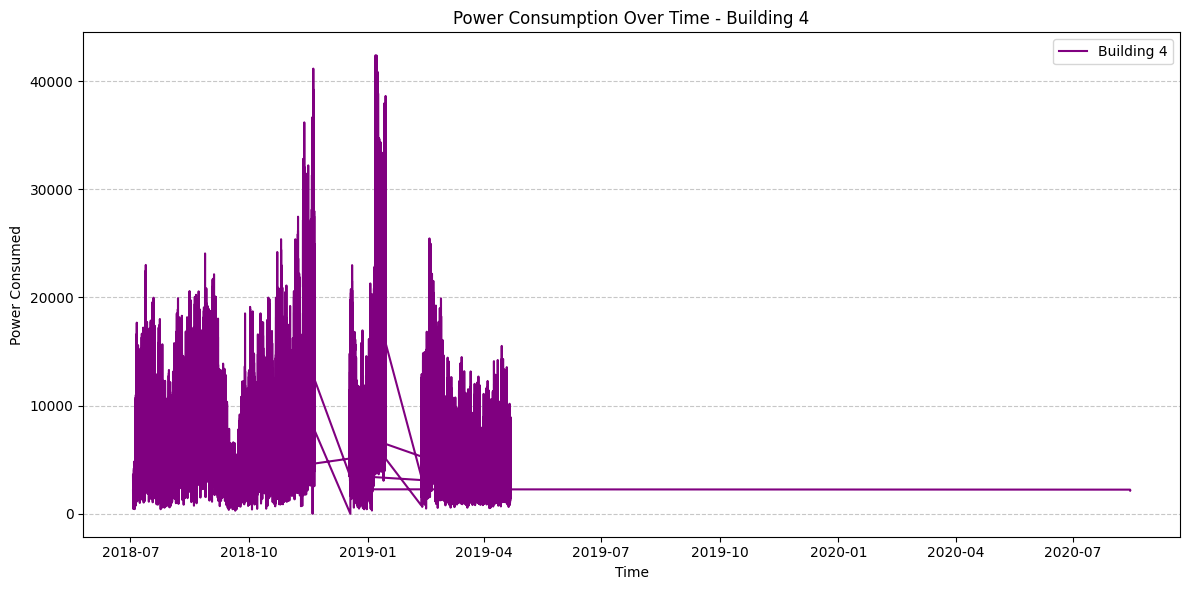

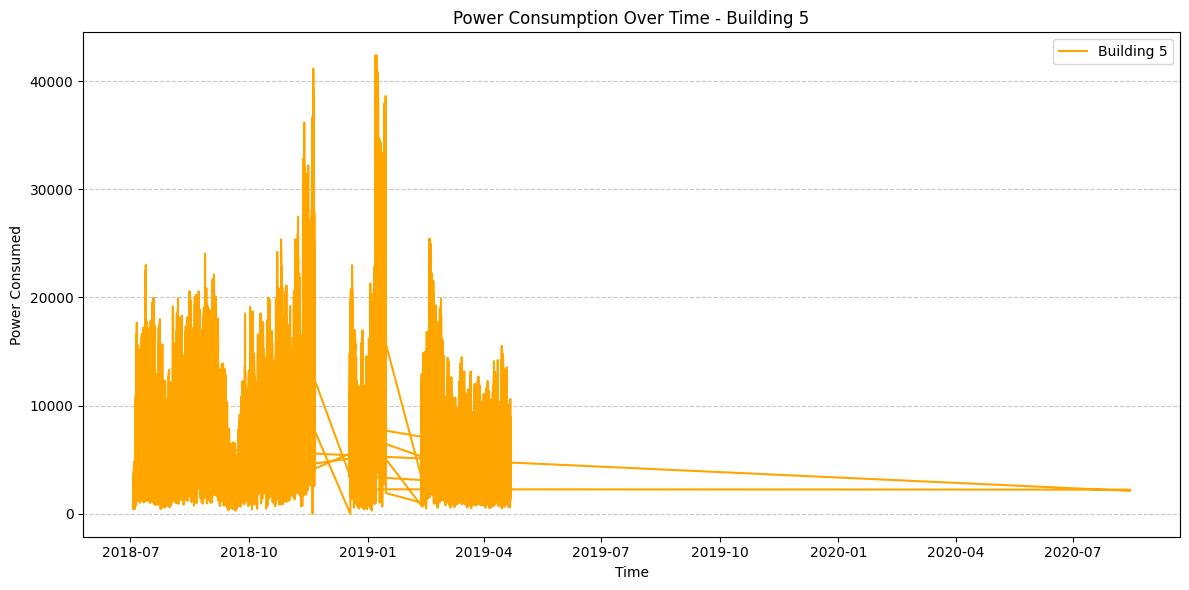

In [ ]:
buildings = [df_building1, df_building2, df_building3, df_building4, df_building5]
building_names = ['Building 1', 'Building 2', 'Building 3', 'Building 4', 'Building 5']
colors = ['blue', 'green', 'red', 'purple', 'orange']

for df in buildings:
    df['System Time'] = pd.to_datetime(df['System Time'])

for i, df in enumerate(buildings):
    plt.figure(figsize=(12, 6))
    plt.plot(df['System Time'], df['Power Consumed'], color=colors[i], label=building_names[i])
    plt.title(f'Power Consumption Over Time - {building_names[i]}')
    plt.xlabel('Time')
    plt.ylabel('Power Consumed')
    plt.legend(loc='upper right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

<bold><h3>Different load curve factors for each building</h3></bold>

In [ ]:
# Connected load values from OpenDSS model
connected_loads = {
    'Hostel1': 80,
    'Hostel2': 90,
    'Lab1': 120,
    'Lab2': 100,
    'Canteen': 60,
}

# Smart meter analysis data (Maximum Demand and Average Load in W, converted to kW)
buildings_data = {
    'Hostel1': {'max_demand': df_building1['Power Consumed'].max() / 1000, 'avg_load': df_building1['Power Consumed'].mean() / 1000},
    'Hostel2': {'max_demand': df_building2['Power Consumed'].max() / 1000, 'avg_load': df_building2['Power Consumed'].mean() / 1000},
    'Lab1': {'max_demand': df_building3['Power Consumed'].max() / 1000, 'avg_load': df_building3['Power Consumed'].mean() / 1000},
    'Lab2': {'max_demand': df_building4['Power Consumed'].max() / 1000, 'avg_load': df_building4['Power Consumed'].mean() / 1000},
    'Canteen': {'max_demand': df_building5['Power Consumed'].max() / 1000, 'avg_load': df_building5['Power Consumed'].mean() / 1000}
}

results = []
for building, data in buildings_data.items():
    connected_load = connected_loads[building]
    max_demand = round(data['max_demand'], 2)  
    avg_load = round(data['avg_load'], 2)      
    
    demand_factor = round(min(max_demand / connected_load, 1), 2)
    
    load_factor = round(avg_load / max_demand, 2)
    
    results.append({
        'Connected Load (kW)': connected_load,
        'Maximum Demand (kW)': max_demand,
        'Average Load (kW)': avg_load,
        'Demand Factor': demand_factor,
        'Load Factor': load_factor
    })

results_df = pd.DataFrame(results, index=buildings_data.keys())
results_df

,Connected Load (kW),Maximum Demand (kW),Average Load (kW),Demand Factor,Load Factor
Hostel1,80,33.21,6.12,0.42,0.18
Hostel2,90,31.04,6.04,0.34,0.19
Lab1,120,38.76,6.15,0.32,0.16
Lab2,100,42.39,6.47,0.42,0.15
Canteen,60,42.39,6.37,0.71,0.15


<bold><h3>Load Forecasting for each building</h3></bold>

c:\Users\Shivansh Kumar Jha\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Shivansh Kumar Jha\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Shivansh Kumar Jha\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Shivansh Kumar Jha\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_m

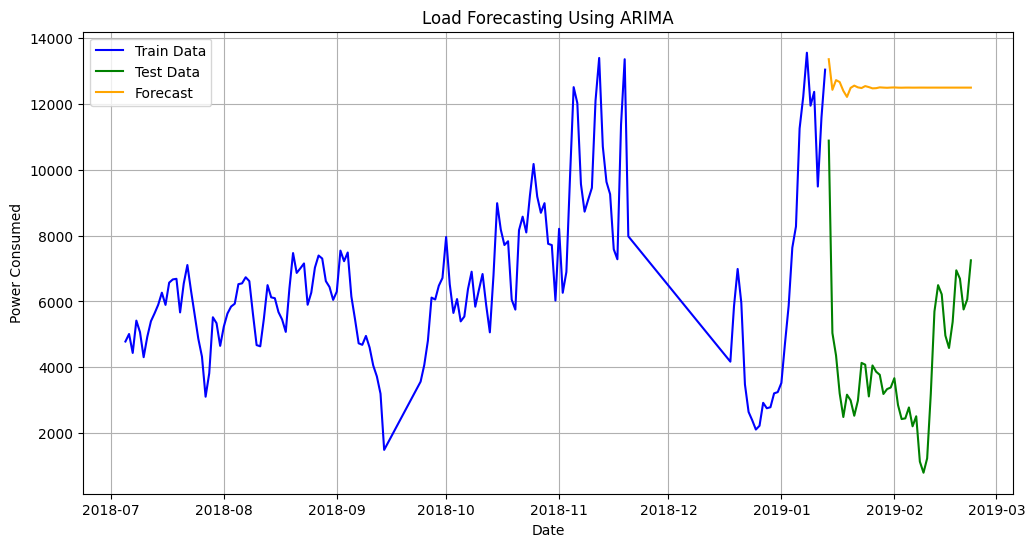

Mean Absolute Error (MAE): 8477.655860235891


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Preprocessing: Resample data to daily frequency
df_building1['System Time'] = pd.to_datetime(df_building1['System Time'])
df_building1.set_index('System Time', inplace=True)
daily_data = df_building1['Power Consumed'].resample('D').mean().dropna()

# Step 1: Train-Test Split
train_size = int(len(daily_data) * 0.8)
train, test = daily_data[:train_size], daily_data[train_size:]

# Step 2: Fit ARIMA Model
# (p, d, q) parameters can be tuned based on ACF/PACF plots or grid search
model = ARIMA(train, order=(5, 1, 0))  # Example parameters: p=5, d=1, q=0
model_fit = model.fit()

# Step 3: Forecast future values
forecast = model_fit.forecast(steps=len(test))

# Step 4: Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train Data', color='blue')
plt.plot(test, label='Test Data', color='green')
plt.plot(test.index, forecast, label='Forecast', color='orange')
plt.title('Load Forecasting Using ARIMA')
plt.xlabel('Date')
plt.ylabel('Power Consumed')
plt.legend()
plt.grid()
plt.show()

# Step 5: Evaluate the Model
mae = mean_absolute_error(test, forecast)
print(f"Mean Absolute Error (MAE): {mae}")